<a href="https://colab.research.google.com/github/Manju-5/Assignment/blob/main/ProjectCarInsurance_EDA(Part%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Insurance Claim Prediction

### Problem Statement
The project discussed here is to implement data analysis tools and techniques and predict whether an insured car will file a claim or not which is a classification prediction.

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('car_insurance_claim.csv') # reading the dataset
data.head() 

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [ ]:
# Making ‘ID’ as the index column
data=data.set_index('ID')

In [ ]:
# Checking the Basic details of Dataset
data.shape

(10302, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 63581743 to 680381960
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   BIRTH       10302 non-null  object 
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10

 Note: From the above output, we see that the data type of 'INCOME', 'HOME_VAL', 'BLUEBOOK''OLDCLAIM' and 'CLM_AMT' is 'object'. But according to data definition, they are numerical variables, which are wrongly interpreted as 'object', so we will convert these variables data type to 'float64'.

In [ ]:
# Replacing the $ symbol
# blue book : buyer's guide or other compilation of statistics and information.
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    data[col].replace({'\$': '', ',': ''}, regex=True,inplace=True) 
     # Inplace is an argument used in different functions. Some functions in which inplace is used as an attributes like, set_index(), dropna(), fillna()
     # A RegEx (Regular Expression), is a sequence of characters that forms a search item, here search item is ',',':'etc.
     # RegEx can be used to check if a string contains the specified search item.ie, if regex true then replace it.

In [ ]:
# Converting columns of dataset as float
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
for col in columns:
    data[col] = data[col].astype(float)

In [ ]:
data.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [ ]:
data.head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
ID,,,,,,,,,,,,,,,,,,,,,
63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,z_No,M,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,z_No,M,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,z_No,M,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,...,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,M,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


Printing the column names in data

In [ ]:
data.columns

Index(['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY'],
      dtype='object')

Summary Statistics of data

In [ ]:
data.describe() #numerical variables

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.
Note, the average age of a driver is 44 years. Average income is 61572. The amount claimed is in between 4725 to 123247.

In [ ]:
data.describe(include=object) # categorical variables

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,10302,10302,10302,10302,10302,9637,10302,10302,10302,10302,10302
unique,6560,2,2,2,5,8,2,6,2,2,2
top,20OCT60,No,Yes,z_F,z_High School,z_Blue Collar,Private,z_SUV,no,No,Highly Urban/ Urban
freq,8,8959,6188,5545,2952,2288,6513,2883,7326,9041,8230


Check unique values

In [ ]:
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

,Unique Values
KIDSDRIV,5
BIRTH,6560
AGE,61
HOMEKIDS,6
YOJ,21
INCOME,8151
PARENT1,2
HOME_VAL,6334
MSTATUS,2
GENDER,2


Check percentage of missing values & Plotting it

In [ ]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
OCCUPATION,665,6.455057
CAR_AGE,639,6.202679
HOME_VAL,575,5.581440
INCOME,570,5.532906
YOJ,548,5.319355
AGE,7,0.067948
KIDSDRIV,0,0.000000
CAR_TYPE,0,0.000000
CLAIM_FLAG,0,0.000000
CLM_AMT,0,0.000000


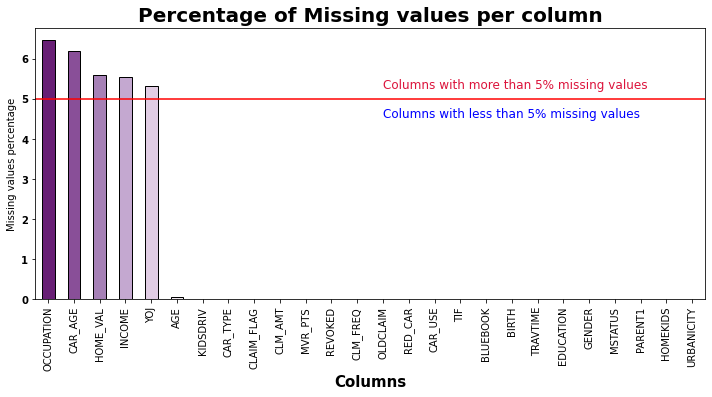

In [ ]:
def msv(data, thresh = 5, color = 'black', edgecolor = 'black', height = 5, width = 12):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Percentage of Missing values per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/2, thresh+0.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top') # # ha =horizontal axis, va= vertical axis ; +.5 = text is .5 above thres line
    plt.text(len(data.isnull().sum()/len(data))/2, thresh - 0.2, f'Columns with less than {thresh}% missing values', fontsize=12, color='blue',
         ha='left' ,va='top') # horizontal axis, vertical axis
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv(data, 5, color=sns.color_palette('PRGn',12))

In [ ]:
# Visualising Missing Values using Heatmap

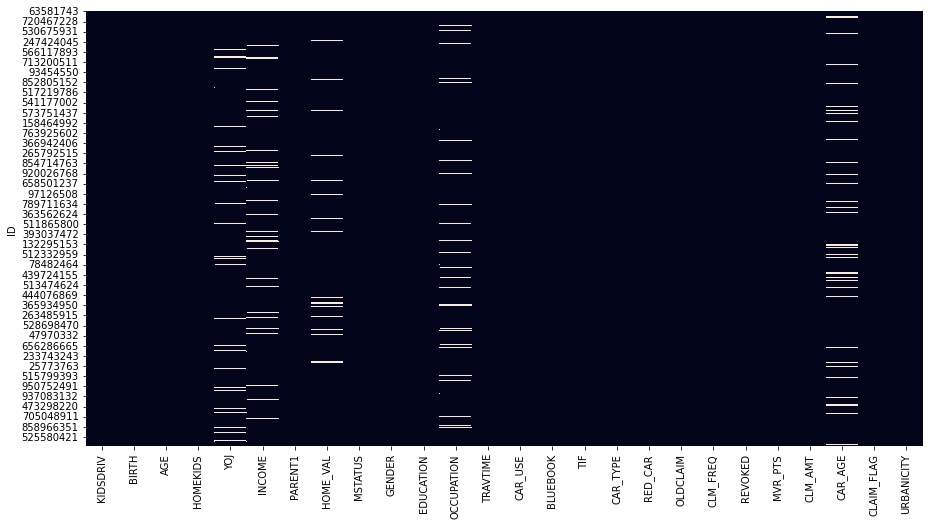

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False) # cbar is the color bar represntatn in right side,it can be given as true also
plt.show()

 Replace special chars in data

In [ ]:
data["EDUCATION"].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [ ]:
data.MSTATUS = data.MSTATUS.apply(lambda x: 'No' if x == 'z_No' else x) # here lambda is used for replacing
data.GENDER = data.GENDER.apply(lambda x: 'F' if x == 'z_F' else x)
data.EDUCATION = data.EDUCATION.apply(lambda x: 'High School' if x == 'z_High School' else x)
data.OCCUPATION = data.OCCUPATION.apply(lambda x: 'Blue Collar' if x == 'z_Blue Collar' else x)
data.CAR_TYPE = data.CAR_TYPE.apply(lambda x: 'SUV' if x == 'z_SUV' else x)
data.URBANICITY = data.URBANICITY.apply(lambda x: 'Highly Rural/ Rural' if x == 'z_Highly Rural/ Rural' else x)

In [ ]:
data['URBANICITY'] = data.URBANICITY.apply(lambda x: x[-5:]) # first 5 words of 'URBANICITY' are taken?

In [ ]:
data["EDUCATION"].value_counts()

High School     2952
Bachelors       2823
Masters         2078
<High School    1515
PhD              934
Name: EDUCATION, dtype: int64

In [ ]:
data.URBANICITY

ID
63581743     Urban
132761049    Urban
921317019    Urban
727598473    Urban
450221861    Urban
             ...  
67790126     Urban
61970712     Urban
849208064    Urban
627828331    Urban
680381960    Rural
Name: URBANICITY, Length: 10302, dtype: object

In [ ]:
data.URBANICITY.value_counts()

Urban    8230
Rural    2072
Name: URBANICITY, dtype: int64

In [ ]:
data.CAR_USE.value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [ ]:
data.OCCUPATION.value_counts()

Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: OCCUPATION, dtype: int64

Filtering out only the numeric variables from the dataframe

In [ ]:
numeric_features = data.select_dtypes(include=np.number) #np numpy?
numeric_features.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

The dataframe numeric_features has 15 numeric variables.

In [ ]:
# Correlation matrix of numeric variables
corr =  numeric_features.corr()
corr

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
KIDSDRIV,1.000000,-0.078427,0.463653,0.042971,-0.043217,-0.015447,0.012207,-0.028508,-0.005830,0.023886,0.038952,0.048424,0.068283,-0.059629,0.108421
AGE,-0.078427,1.000000,-0.447787,0.140878,0.186202,0.209600,-0.001569,0.166290,-0.001890,-0.033378,-0.037641,-0.075732,-0.049034,0.178592,-0.106969
HOMEKIDS,0.463653,-0.447787,1.000000,0.077707,-0.160230,-0.107483,-0.000722,-0.108569,0.007509,0.029756,0.038661,0.064294,0.068646,-0.159008,0.123049
YOJ,0.042971,0.140878,0.077707,1.000000,0.293899,0.272198,-0.017152,0.148086,0.023921,-0.005077,-0.023535,-0.041593,-0.026799,0.064685,-0.066265
INCOME,-0.043217,0.186202,-0.160230,0.293899,1.000000,0.578943,-0.051853,0.429095,0.002361,-0.039347,-0.049220,-0.063495,-0.057686,0.417301,-0.142587
HOME_VAL,-0.015447,0.209600,-0.107483,0.272198,0.578943,1.000000,-0.035139,0.261962,0.006768,-0.059803,-0.093854,-0.092460,-0.091987,0.223198,-0.185390
TRAVTIME,0.012207,-0.001569,-0.000722,-0.017152,-0.051853,-0.035139,1.000000,-0.022536,-0.013327,-0.013806,0.008274,0.009694,0.031270,-0.033290,0.053283
BLUEBOOK,-0.028508,0.166290,-0.108569,0.148086,0.429095,0.261962,-0.022536,1.000000,0.000705,-0.030725,-0.042130,-0.044818,-0.002443,0.194366,-0.103287
TIF,-0.005830,-0.001890,0.007509,0.023921,0.002361,0.006768,-0.013327,0.000705,1.000000,-0.015520,-0.017378,-0.031164,-0.046518,0.007897,-0.081225
OLDCLAIM,0.023886,-0.033378,0.029756,-0.005077,-0.039347,-0.059803,-0.013806,-0.030725,-0.015520,1.000000,0.494468,0.262031,0.076535,-0.019163,0.142918


In [ ]:
corr.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

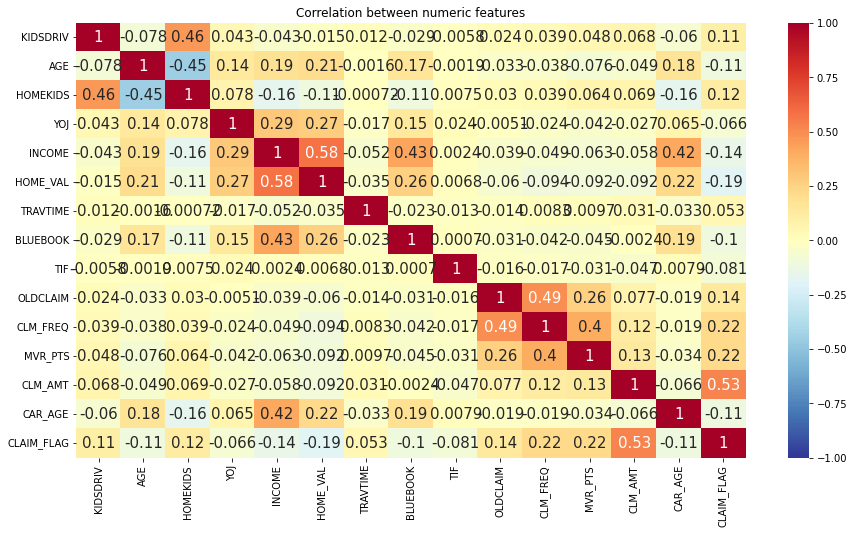

In [ ]:
# Ploting the heatmap of correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='RdYlBu_r', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
# annot_kws= is used to change the text properties, typically the fontsize.
plt.title('Correlation between numeric features')
plt.show()

Filter out only the categoric variables from the dataframe

In [ ]:
data.describe(include=object)

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
count,10302,10302,10302,10302,10302,9637,10302,10302,10302,10302,10302
unique,6560,2,2,2,5,8,2,6,2,2,2
top,20OCT60,No,Yes,F,High School,Blue Collar,Private,SUV,no,No,Urban
freq,8,8959,6188,5545,2952,2288,6513,2883,7326,9041,8230


There are 11 categorical variables. From the output we see that the variable 'BIRTH' has most number of categories. There are 6560 dates in the data, of which 20OCT60 occurs most of the time.

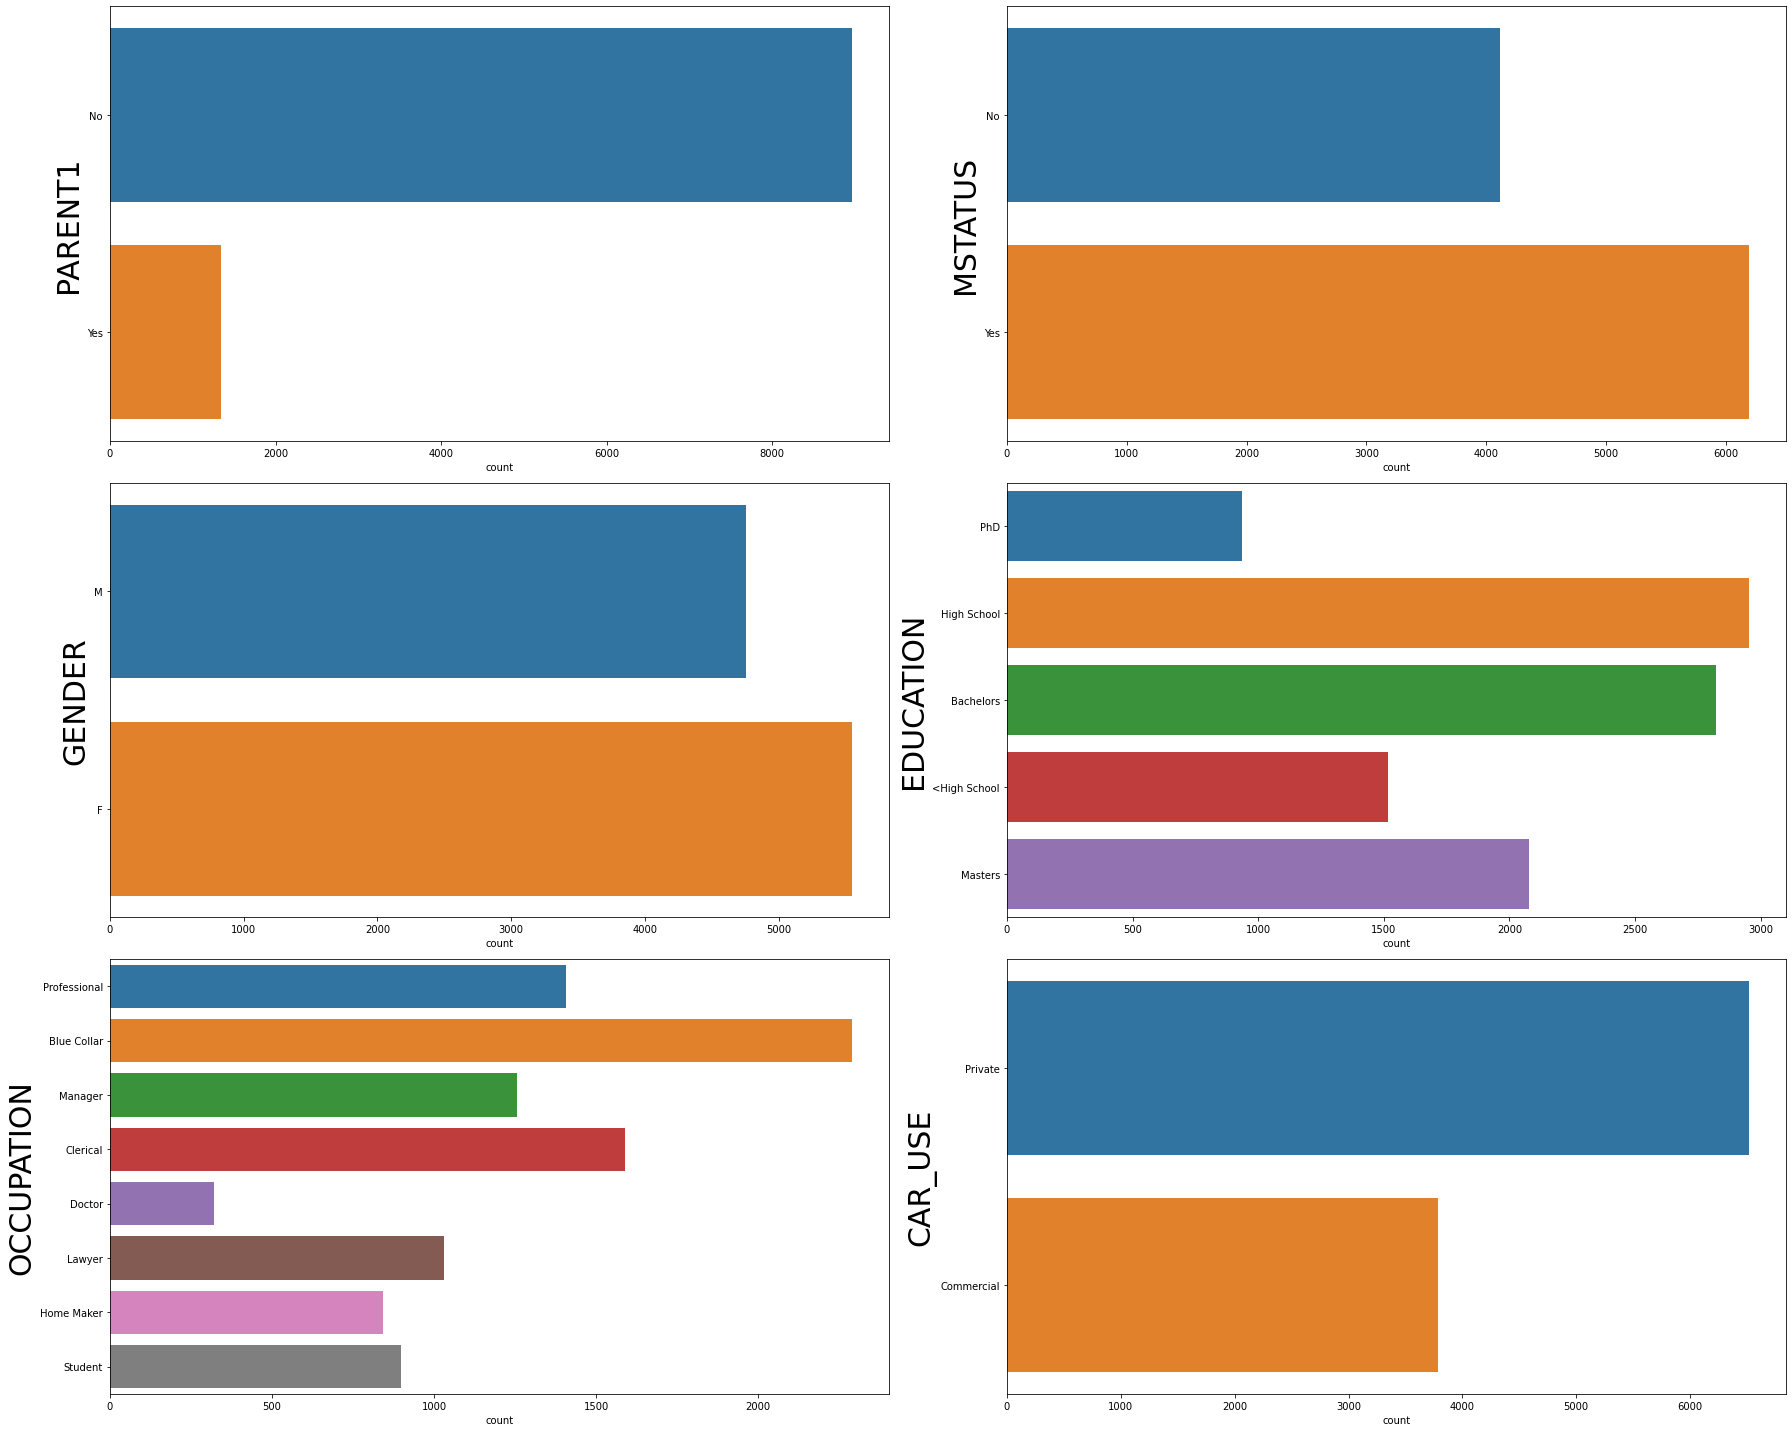

In [ ]:
# countplot
categoric_features = data.select_dtypes(include='object').drop(['BIRTH'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20)) # ax= axes
for variable, subplot in zip(categoric_features, ax.flatten()):
    countplot = sns.countplot(y=data[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area  
plt.show()

From the above plot we see that: 
* The number of single parents are few in number
* Most of them are married
* The number of females are higher than males
* Most of the people in the data have high school education & only few are having PhD
* Occupation of most of the people is Blue Collar & few are doctors
* Commercial usage of car is significantly low compared to private

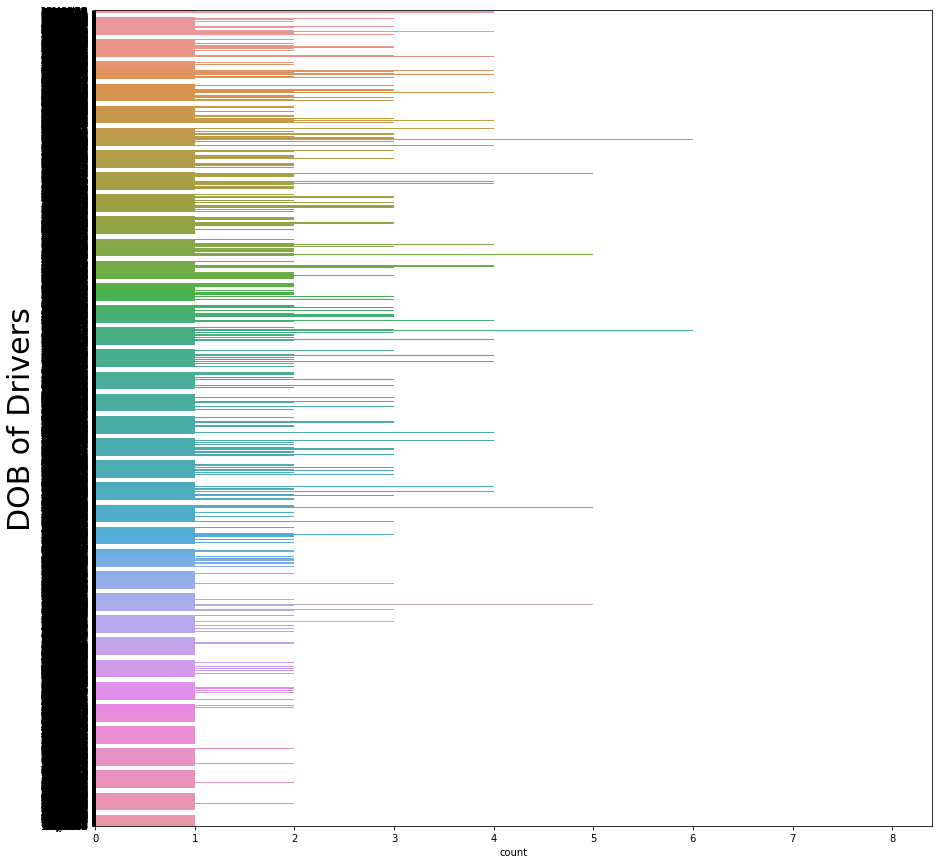

In [ ]:
plt.figure(figsize=(15, 15))
countplot = sns.countplot(y=data['BIRTH'], orient="h")
countplot.set_ylabel('DOB of Drivers', fontsize = 30)
plt.show()

We see that there are many dates considered in the data. It is quite difficult to perform meaningful analysis on this variable.

## Analyzing Relationship Between Target and Categorical Variables

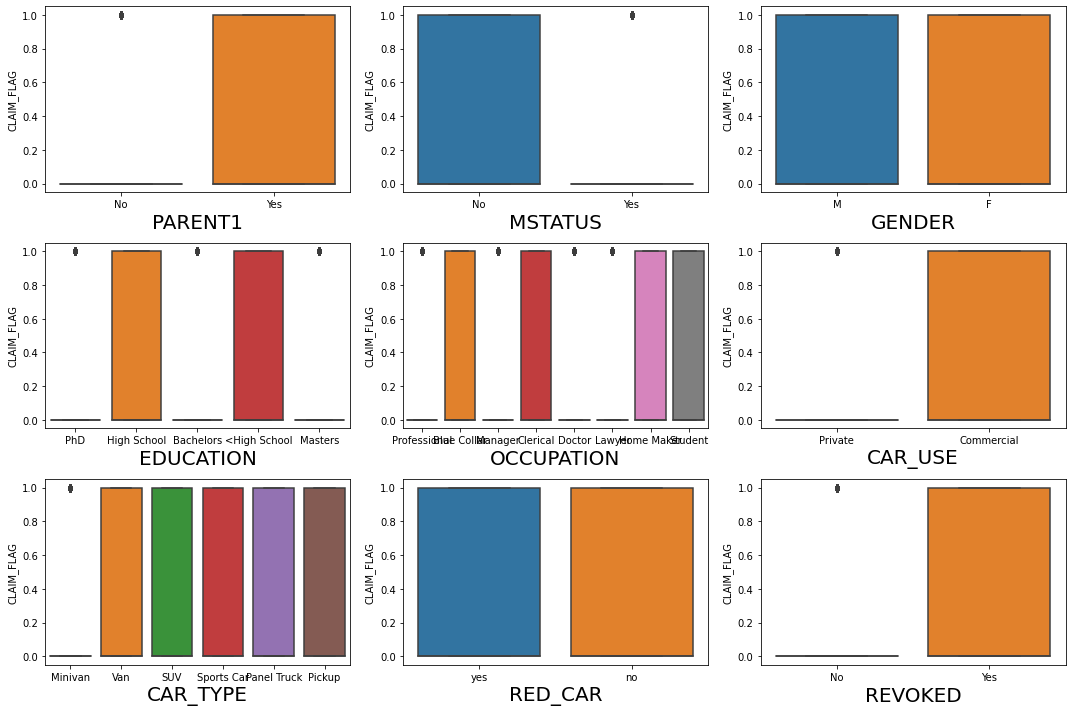

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(categoric_features, ax.flatten()): # zip() method takes iterable or containers and returns a single iterator object, having mapped values from all the containers
    boxplt = sns.boxplot(x=variable, y='CLAIM_FLAG', data=data, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 20)
plt.tight_layout()   
plt.show()

 Plotting numeric variables

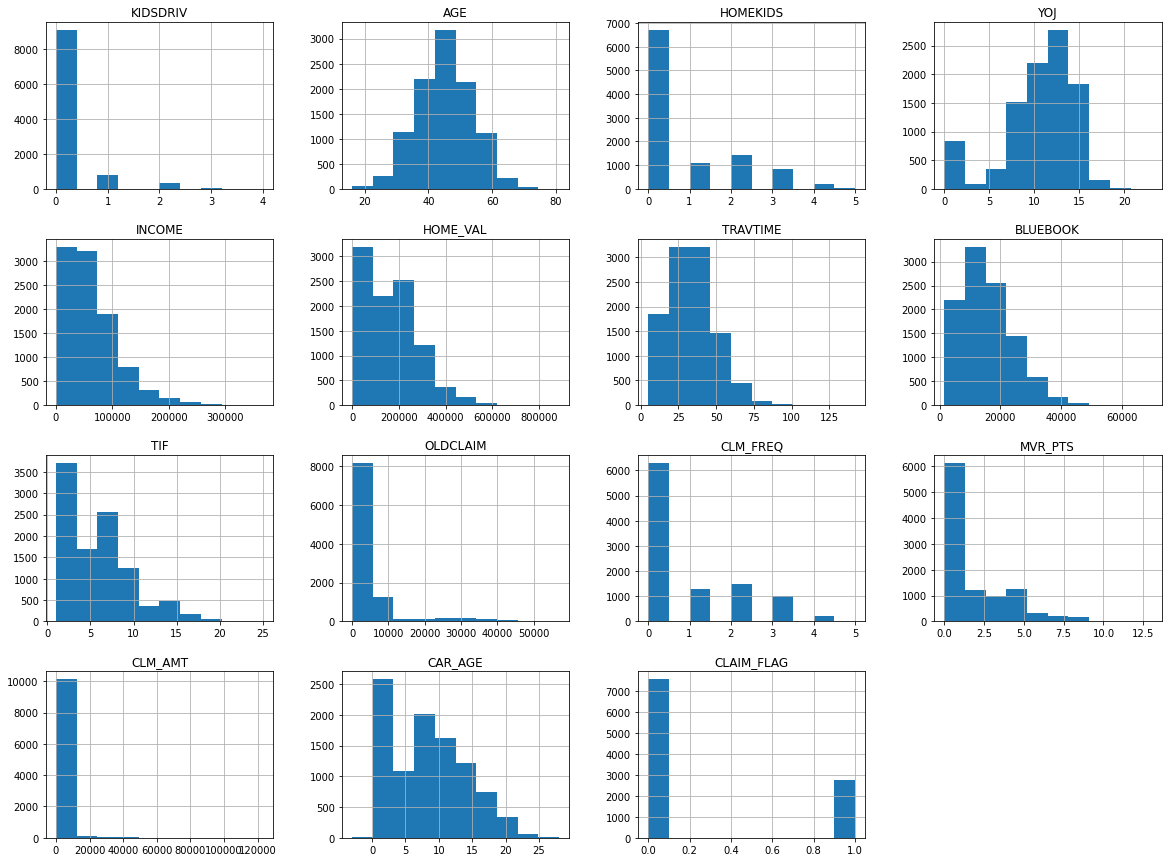

In [ ]:
# Numerical data
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

1st plot right skew, 2nd is normal distri. last fig implies that those who claimed are less and those who did not claimed are more.

 Plotting Age Distribution

In [ ]:
# histogram plot ;  plotly. express module (usually imported as px )
fig = px.histogram(data,x='AGE',marginal='box',nbins=30,title='DISTRIBUTION OF AGE')
fig.update_layout(bargap=0.2)
fig.show()

 Plotting Claim Flag vs Income

Text(0.5, 1.0, 'INCOME')

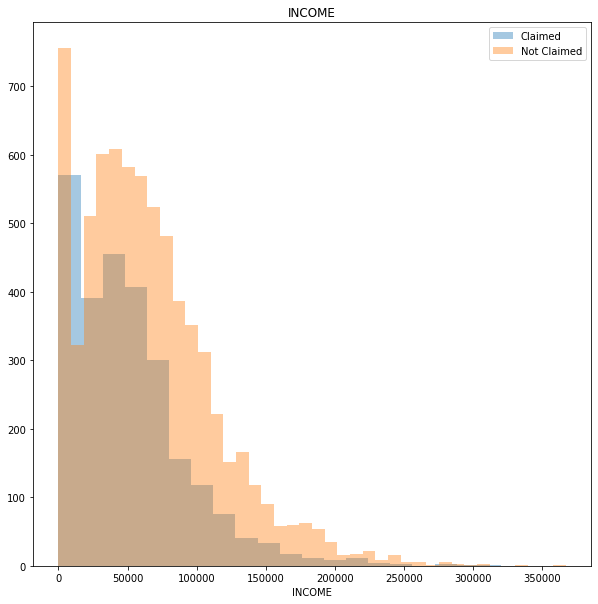

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 10))
ax = sns.distplot(data[data["CLAIM_FLAG"]==1]["INCOME"], bins=20, label = "Claimed", ax = axes, kde = False)
ax = sns.distplot(data[data["CLAIM_FLAG"]==0]["INCOME"], bins=40, label = "Not Claimed", ax = axes, kde = False)
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function
ax.legend() # Legends are a useful way to label data series plotted on a graph.
ax.set_title("INCOME")

Insurance is claimed mostly by people in range of income 0-50000 ie only few people of high income have claimed insurance

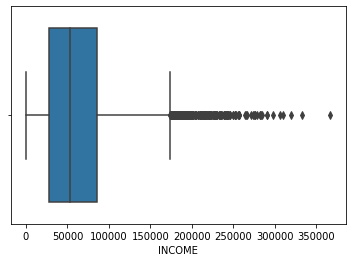

In [ ]:
sns.boxplot(data.INCOME)
plt.show()

There seems to be few outliers in Income.

1.1616696199725831


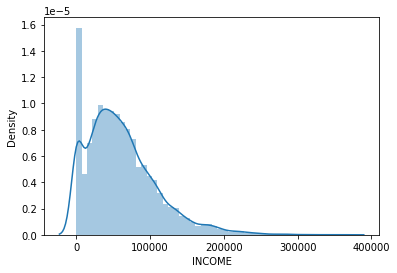

In [ ]:
# Plotting the skewness of income
sns.distplot(data.INCOME)
print(data.INCOME.skew())


 Plotting mean & median of Income

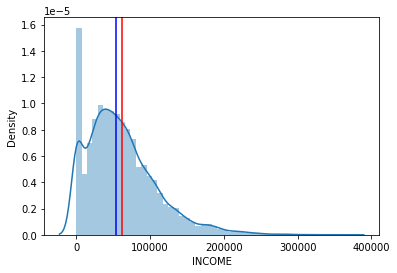

In [ ]:
sns.distplot(data.INCOME)
plt.axvline(data.INCOME.mean(),color='r') # axvline() function in axes module of matplotlib library is used to add a vertical line across the axis
# mean -red line, median -blue line
plt.axvline(data.INCOME.median(),color='b')
plt.show()

The above plot is a bell plot.This is rightly skewed.

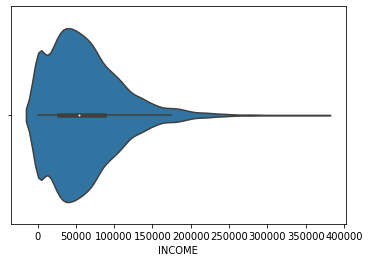

In [ ]:
sns.violinplot(data.INCOME)
plt.show()

The above plot is a violin plot.Violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

median (a white dot on the violin plot)
interquartile range (the black bar in the center of violin)
the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique

Age is less than 30 & Income greater than 40000

In [ ]:
data[(data.AGE<30)&(data.INCOME>40000)]

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
ID,,,,,,,,,,,,,,,,,,,,,
235358484,0,22FEB71,28.0,1,13.0,44077.0,No,170598.0,Yes,F,...,SUV,no,8935.0,2,No,0,6857.0,1.0,1,Urban
106556153,0,04MAR73,26.0,0,8.0,53244.0,No,0.0,No,M,...,Van,yes,6224.0,1,No,1,4028.0,8.0,1,Urban
180019907,0,03NOV70,29.0,1,11.0,51122.0,No,201650.0,Yes,F,...,SUV,no,19030.0,3,Yes,9,0.0,9.0,0,Urban
514109893,0,08MAY74,25.0,1,9.0,51544.0,Yes,NaN,No,F,...,SUV,no,7767.0,2,No,8,9776.0,1.0,1,Urban
695833713,0,11APR70,29.0,1,8.0,73842.0,Yes,0.0,No,F,...,Sports Car,no,4769.0,1,No,4,3418.0,1.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577969505,0,10DEC73,25.0,2,11.0,44516.0,Yes,0.0,No,F,...,Sports Car,no,0.0,0,No,0,864.0,1.0,1,Urban
203680274,0,18JUN71,28.0,4,16.0,68394.0,No,226146.0,Yes,M,...,Minivan,no,6013.0,2,No,8,4193.0,8.0,1,Urban
197331534,0,21JUL72,27.0,0,12.0,42254.0,No,138816.0,No,F,...,SUV,no,32025.0,3,Yes,3,3790.0,6.0,1,Urban


Scatterplot of Age vs Income

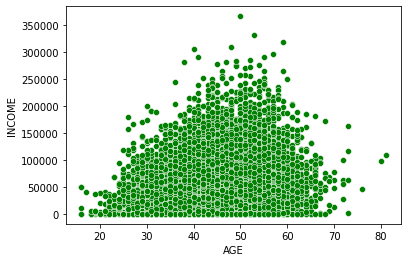

In [ ]:
sns.scatterplot(data.AGE,data.INCOME,color='green')
plt.show()
# income (25L) 30 lakh above -outlier ; 20 to 70 age people has more income

In [ ]:
data.groupby(['GENDER'])['INCOME'].sum()

GENDER
F    295743475.0
M    303475942.0
Name: INCOME, dtype: float64

In [ ]:
data.groupby(('URBANICITY'),['GENDER']=='M').max()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
URBANICITY,,,,,,,,,,,,,,,,,,,,,
Rural,4,31OCT58,76.0,5,19.0,282292.0,Yes,583508.0,Yes,M,...,25,Van,yes,50807.0,4,Yes,13,64182.0,26.0,1
Urban,4,31OCT73,81.0,5,23.0,367030.0,Yes,885282.0,Yes,M,...,25,Van,yes,57037.0,5,Yes,13,123247.0,28.0,1


In [ ]:
data.groupby(('CAR_TYPE'),['RED_CAR']=='yes').max()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
CAR_TYPE,,,,,,,,,,,,,,,,,,,,,
Minivan,3,31OCT73,80.0,5,23.0,367030.0,Yes,885282.0,Yes,M,...,25,yes,53986.0,5,Yes,11,77907.0,26.0,1,Urban
Panel Truck,3,31OCT58,62.0,5,19.0,332339.0,Yes,750455.0,Yes,M,...,21,yes,52507.0,5,Yes,11,78874.0,25.0,1,Urban
Pickup,4,31OCT69,68.0,5,19.0,309628.0,Yes,669271.0,Yes,M,...,22,yes,51345.0,5,Yes,13,123247.0,24.0,1,Urban
SUV,4,31OCT59,72.0,5,19.0,264817.0,Yes,603984.0,Yes,M,...,25,yes,52465.0,5,Yes,12,61678.0,25.0,1,Urban
Sports Car,4,31OCT68,81.0,5,23.0,253058.0,Yes,550223.0,Yes,M,...,21,yes,57037.0,5,Yes,11,85524.0,25.0,1,Urban
Van,3,31OCT53,66.0,5,19.0,276354.0,Yes,630267.0,Yes,M,...,21,yes,54399.0,5,Yes,11,107586.0,28.0,1,Urban


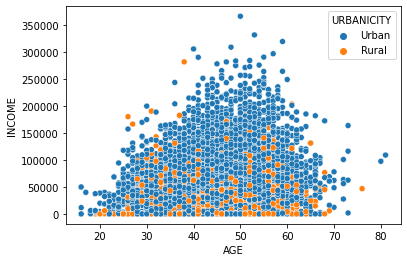

In [ ]:
# Scatterplot of Age vs Income based on Urban & Rural
sns.scatterplot(data.AGE,data.INCOME,hue=data.URBANICITY)
plt.show()

<Figure size 864x576 with 0 Axes>

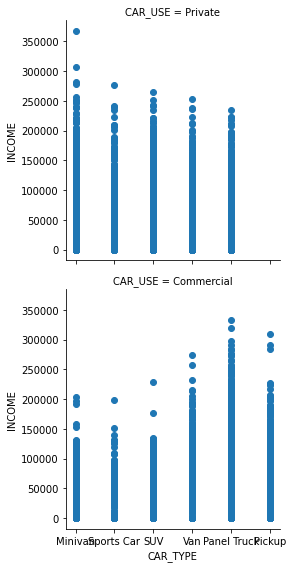

In [ ]:
# Plotting of car use vs income & car type vs income
plt.figure(figsize=(12,8))
g=sns.FacetGrid(data, row='CAR_USE', height=4, aspect=1)
g=(g.map(plt.scatter ,'CAR_TYPE','INCOME').add_legend());